In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean
import seaborn as sns
from scipy.optimize import curve_fit
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
ncol = 256
nbmax_interfaces = 20000

In [3]:
def fq2q4(x, b, c ):
    """Fit function y=f(x,p) with parameters p=(b,c). """
    return ((b**2)*(x**2) + (c**2)*(x**4))

In [4]:
def fq2(x, a ):
    """Fit function y=f(x,p) with parameters p=(a). """
    return (a**2)*(x**2) 

In [5]:
temperatures = [32]  #[0.08, 0.09, 0.11, 0.12] #[30, 60, 90] 
nb_temperatures = len(temperatures)
nb_realisations = 1
interface_step=1000
J12=30
B1=100
B2=100
interfaces = np.zeros((nb_realisations, nb_temperatures, nbmax_interfaces, ncol), dtype=float)
temps_interfaces = np.zeros((nb_realisations, nb_temperatures, nbmax_interfaces), dtype=int)
interface_fake = np.zeros(ncol, dtype=float)
moys = np.zeros((nb_realisations, nb_temperatures, nbmax_interfaces), dtype=float)
spectres = np.zeros((nb_realisations, nb_temperatures, nbmax_interfaces, ncol), dtype=complex)
moyenne_q = np.zeros((nb_realisations, nb_temperatures, ncol), dtype=float)
hfitted_q2q4 = np.zeros((nb_realisations, nb_temperatures, ncol//2), dtype=float)
hfitted_q2 = np.zeros((nb_realisations, nb_temperatures, ncol//2), dtype=float)
nb_interfaces_lues = np.zeros((nb_realisations, nb_temperatures), dtype = int)
pourcentage_zeros = 0.0

In [6]:
# teste le pourcentage de zeros pour rejeter les interfaces mal formées
def tester_interface(interface_fake):
    global pourcentage_zeros  #valeurs globales
    nb_zeros = len(interface_fake[interface_fake==0])
    if (nb_zeros/len(interface_fake) <= pourcentage_zeros):
        return True
    return False

In [7]:
# on garde cette interface en remplaçant les zéros par la moyenne des valeurs non nulles
def produire_interface(interface_fake, ind_R,ind_T,ind):
    global interfaces  #valeurs globales
    moy = np.mean(interface_fake[interface_fake!=0])
    for j in range(ncol):
        if interface_fake[j] !=0:
            interfaces[ind_R][ind_T][ind][j] = interface_fake[j]
        else:
            interfaces[ind_R][ind_T][ind][j] = moy        

In [8]:
for ind_R in range(nb_realisations):
    for ind_T, T in enumerate(temperatures):
    #     nom_fichier_interfaces = "ligneInterface_T=" + str(int(T)) + "_J12=" + str(J12) + \
    #     "_B1=" + str(B1) + "_B2=" + str(B2) + ".txt"
        #nom_fichier_interfaces = "archives_cluster_J12=40_t=600000_nodiv_noapop/ligneInterface_div_apop_T=" + str(int(T)) + "_real=" + str(ind_R) + ".txt"    
        #nom_fichier_interfaces = "archives_scenarios_div_apop/ligneInterface_T=" + str(T) + "_real=" + str(ind_R) + ".txt"    
        nom_fichier_interfaces = "archives_cluster_millions_256_1/ligneInterface_T=" + str(T) + "_real=" + str(ind_R) + ".txt"    

        f_interfaces = open(nom_fichier_interfaces, "r")
        lignes = f_interfaces.readlines()
        ind = 0
        for line in lignes:
            liste_lue = [int(i) for i in line.split()]
            if (min(liste_lue) == 0 ):
                print("une interface avec des zeros")
                for j in range(ncol):
                    interface_fake[j] = liste_lue[j+1]  
                valide = tester_interface(interface_fake)
                if valide:
                    produire_interface(interface_fake, ind_R, ind_T,ind)
                    temps_interfaces[ind_R][ind_T][ind]=liste_lue[0]
                    ind+=1
                continue


            for j in range(ncol):
                interfaces[ind_R][ind_T][ind][j] = liste_lue[j+1]
            temps_interfaces[ind_R][ind_T][ind]=liste_lue[0]
            ind+=1 
        nb_interfaces_lues[ind_R][ind_T] = ind
        print("j'ai lu ", nb_interfaces_lues[ind_R][ind_T], " interfaces valides pour la realisation ", ind_R, " et la temperature ", T)

j'ai lu  1000  interfaces valides pour la realisation  0  et la temperature  32


In [9]:
nb_interfaces_lues

array([[1000]])

In [10]:
# for ind_T, T in enumerate(temperatures):
#     nom_fichier_interfaces = "ligneInterfaceT=" + str(int(T)) + "_J12=" + str(J12) + \
#     "_B1=" + str(B1) + "_B2=" + str(B2) + ".txt"
#     f_interfaces = open(nom_fichier_interfaces, "r")
#     lignes = f_interfaces.readlines()
#     ind = 0
#     for line in lignes:
#         liste_lue = [int(i) for i in line.split()]
#         #print("longueur de line :", len(liste_lue))
#         if (min(liste_lue) <=0 ):
#             print("un 0 dans l'interface! j'ignore cette interface")
#         else:
#             #moys[ind_T][ind] = mean(liste_lue)
#             for j in range(ncol):
#                 interfaces[ind_T][ind][j] = liste_lue[j] - moys[ind_T][ind]
#             ind+=1 
#     nb_interfaces_lues[ind_T] = ind
#     print("j'ai lu ", nb_interfaces_lues[ind_T], "interfaces valides pour la temperature ", T)

In [11]:
interfaces[0][0].shape

(20000, 256)

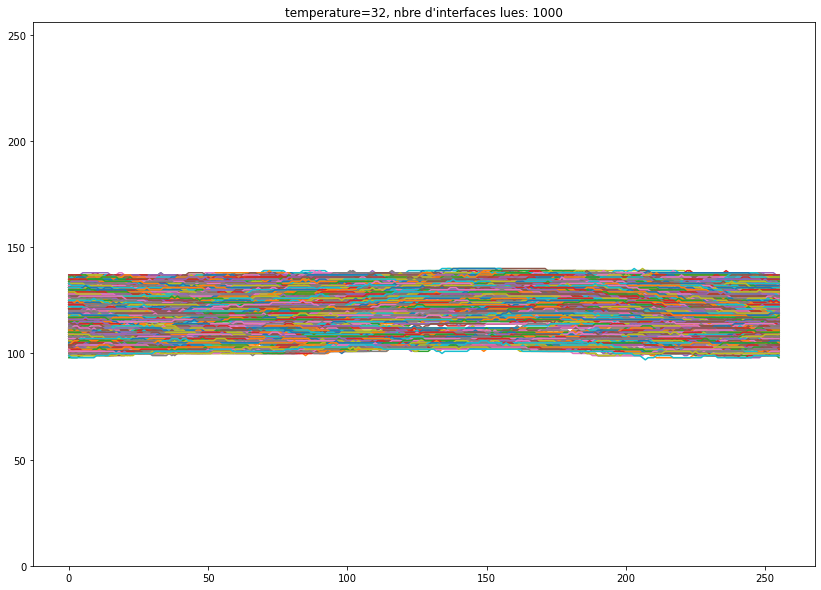

In [12]:
#temperatures = [30, 60, 90] 
plt.figure(figsize=(14, 10))
#plt.ylim([-ncol//2, ncol//2])
plt.ylim([0, ncol])
for ind_R in [0]:
    for ind_T in [0]:
        #for ind in [200,800]: #list(range(0,nb_interfaces_lues[ind_R][ind_T])): 
        for ind in (range(0,nb_interfaces_lues[ind_R][ind_T])):    
        #for ind in range(803,804):   
        #for ind in range(0,300):   
            moy=0 #np.mean(interfaces[ind_R][ind_T][ind])
            plt.plot(interfaces[ind_R][ind_T][ind] - moy)   # + moys[ind_T][ind])
            plt.title("temperature="+str(temperatures[ind_T])+", nbre d'interfaces lues: "+ str(nb_interfaces_lues[ind_R][ind_T]))

In [13]:
ind_R=0
[temps_interfaces[ind_R][0][i] for i in range(nbmax_interfaces-1) if (temps_interfaces[ind_R][0][i]!=0 and temps_interfaces[ind_R][0][i+1]==0)]

[1000000]

In [14]:
liste_etendues_corr=[]
for ind_R in range(nb_realisations):
    liste_valeurs_limite_corr=[temps_interfaces[ind_R][0][i] for i in range(nbmax_interfaces-1) if (temps_interfaces[ind_R][0][i+1] - temps_interfaces[ind_R][0][i]>interface_step)]
    if (len(liste_valeurs_limite_corr) > 0):
        liste_etendues_corr.append(liste_valeurs_limite_corr[0])
duree_limite_corr_max=0
duree_limite_corr_min=0
if (len(liste_etendues_corr) > 0) :
    duree_limite_corr_max = max(liste_etendues_corr)
    duree_limite_corr_min = min(liste_etendues_corr)
print("min=",duree_limite_corr_min)
print("max=",duree_limite_corr_max)

min= 0
max= 0


In [15]:
temps_interfaces[0][0]

array([   1000,    2000,    3000,    4000,    5000,    6000,    7000,
          8000,    9000,   10000,   11000,   12000,   13000,   14000,
         15000,   16000,   17000,   18000,   19000,   20000,   21000,
         22000,   23000,   24000,   25000,   26000,   27000,   28000,
         29000,   30000,   31000,   32000,   33000,   34000,   35000,
         36000,   37000,   38000,   39000,   40000,   41000,   42000,
         43000,   44000,   45000,   46000,   47000,   48000,   49000,
         50000,   51000,   52000,   53000,   54000,   55000,   56000,
         57000,   58000,   59000,   60000,   61000,   62000,   63000,
         64000,   65000,   66000,   67000,   68000,   69000,   70000,
         71000,   72000,   73000,   74000,   75000,   76000,   77000,
         78000,   79000,   80000,   81000,   82000,   83000,   84000,
         85000,   86000,   87000,   88000,   89000,   90000,   91000,
         92000,   93000,   94000,   95000,   96000,   97000,   98000,
         99000,  100

In [16]:
for ind_R in range(nb_realisations):
    for ind_T in range(nb_temperatures):
        for ind in range(nb_interfaces_lues[ind_R][ind_T]):
            moys[ind_R][ind_T][ind] = np.mean(interfaces[ind_R][ind_T][ind])   

In [17]:
for ind_R in range(nb_realisations):
    for ind_T in range(nb_temperatures):
        for ind in range(nb_interfaces_lues[ind_R][ind_T]):
            spectres[ind_R][ind_T][ind] = np.fft.fft(interfaces[ind_R][ind_T][ind] - moys[ind_R][ind_T][ind])    

In [18]:
#spectres[0][0:10]

In [19]:
for ind_R in range(nb_realisations):
    for ind_T in range(nb_temperatures):
        if (nb_interfaces_lues[ind_R][ind_T] != 0):
            for i in range(ncol):            
                moyenne_q[ind_R][ind_T][i] = np.mean((abs(spectres[ind_R][ind_T][0:nb_interfaces_lues[ind_R][ind_T],i]))**2)
                #moyenne_q[ind_T][i] = np.mean((abs(spectres[ind_T][:,i]))**2)
        else:
            print("aucune interface valide pour la température ", temperatures[ind_T])

In [20]:
#moyenne_q[1][500]

In [21]:
#spectres[1][1].shape

In [22]:
for ind_R in range(nb_realisations):
    x = np.array(list(range(ncol//2)))
    for ind_T in range(nb_temperatures):
        if (nb_interfaces_lues[ind_R][ind_T] != 0):
            popt, pcov = curve_fit(fq2q4, x[1:50] , 1/moyenne_q[ind_R][ind_T][1:50])     #[0:ncol//2])
            b, c = popt
            print("T=%g, Optimal parameters are , b**2=%g, and c**2=%g, (b**2)*T=%g, (c**2)*T=%g" % (temperatures[ind_T], b**2, c**2, (b**2)*temperatures[ind_T], (c**2)*temperatures[ind_T] ))
            hfitted_q2q4[ind_R][ind_T] = fq2q4(x, *popt)

T=32, Optimal parameters are , b**2=2.1315e-05, and c**2=9.81928e-19, (b**2)*T=0.00068208, (c**2)*T=3.14217e-17


/home/djamel/anaconda3/envs/conda-088-env/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [23]:
for ind_R in range(nb_realisations):
    x = np.array(list(range(ncol//2)))
    for ind_T in range(nb_temperatures):
        if (nb_interfaces_lues[ind_R][ind_T] != 0):
            popt, pcov = curve_fit(fq2, x[1:50] , 1/moyenne_q[ind_R][ind_T][1:50])     #[0:ncol//2])
            a = popt
            print("T=%g, Optimal parameters are , a**2=%g, (a**2)*T=%g"  % (temperatures[ind_T], a**2, (a**2)*temperatures[ind_T]))
            hfitted_q2[ind_R][ind_T] = fq2(x, *popt)

T=32, Optimal parameters are , a**2=2.1315e-05, (a**2)*T=0.00068208


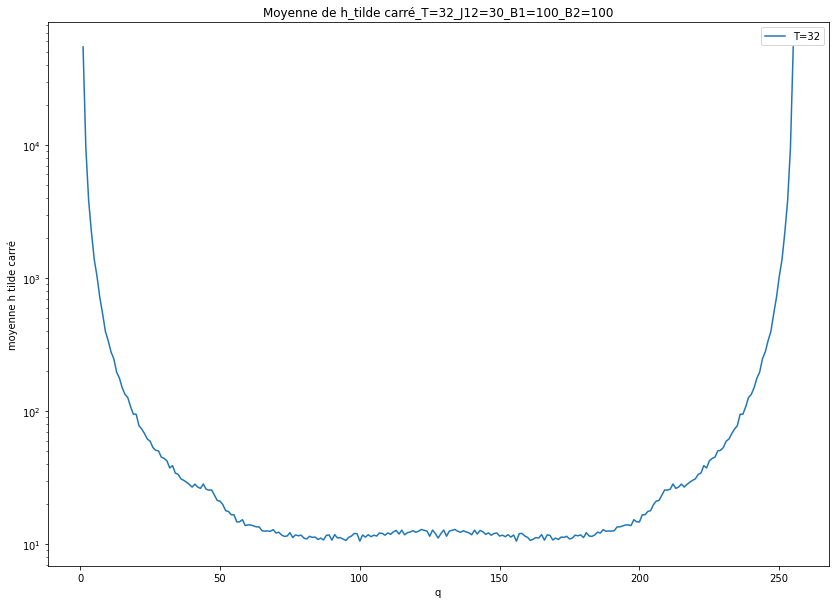

In [24]:
#temperatures = [30, 60, 90] 
ind_R=0
ind_T=0
plt.figure(figsize=(14, 10))
plt.plot(list(range(1,ncol)), moyenne_q[ind_R][ind_T][1:], label="T="+str(temperatures[ind_T]))
#plt.plot(list(range(ncol//2)),hfitted[ind_T], color="r", label="1/h fitted-T="+ str(temperatures[ind_T]))
plt.xlabel("q")
#plt.ylim(0,0.002)
#plt.xlim(0,50)
plt.ylabel("moyenne h tilde carré")
plt.legend()
plt.title("Moyenne de h_tilde carré_T="+str(temperatures[ind_T])+"_J12="+str(J12)+"_B1="+str(B1)+"_B2="+str(B2))
# plt.plot(np.log(1/norm_moyenne_q))
# plt.plot(interfaces[12])
plt.yscale('log')

Text(0.5, 1.0, 'Inverse de moyenne du carré de h-tilde_T=32_J12=30_B1=100_B2=100')

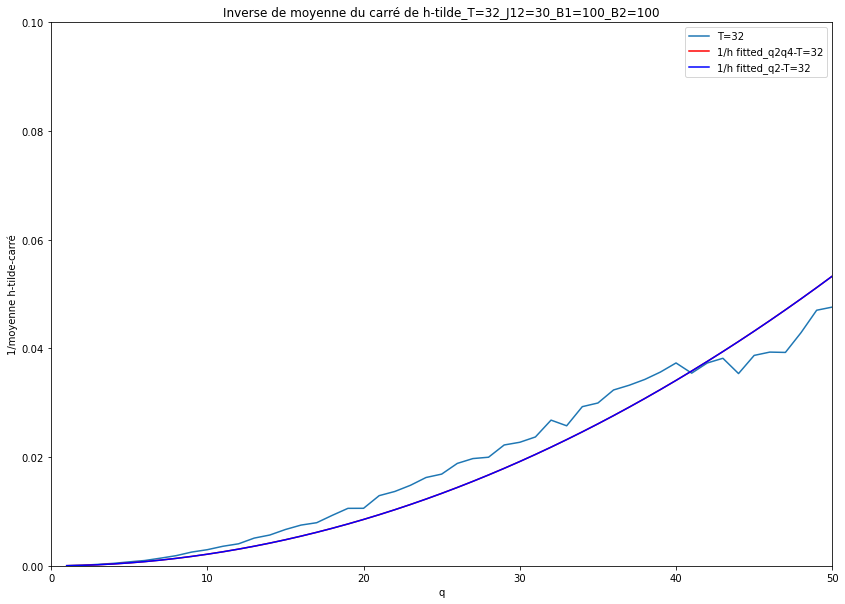

In [25]:
#temperatures = [30, 60, 90] 
ind_R=0
ind_T=0
plt.figure(figsize=(14, 10))
plt.plot(list(range(1,ncol)), 1/moyenne_q[ind_R][ind_T][1:], label="T="+str(temperatures[ind_T]))
plt.plot(list(range(1,ncol//2)),hfitted_q2q4[ind_R][ind_T][1:], color="r", label="1/h fitted_q2q4-T="+ str(temperatures[ind_T]))
plt.plot(list(range(1,ncol//2)),hfitted_q2[ind_R][ind_T][1:], color="b", label="1/h fitted_q2-T="+ str(temperatures[ind_T]))

plt.xlabel("q")
plt.ylim(0,0.1)
plt.xlim(0,50)
plt.ylabel("1/moyenne h-tilde-carré")
plt.legend()
plt.title("Inverse de moyenne du carré de h-tilde_T="+str(temperatures[ind_T])+"_J12="+str(J12)+"_B1="+str(B1)+"_B2="+str(B2))
# plt.plot(np.log(1/norm_moyenne_q))
# plt.plot(interfaces[12])
#plt.yscale('log')

Text(0.5, 1.0, 'Inverse de moyenne du carré de h-tilde_T=32_J12=30_B1=100_B2=100')

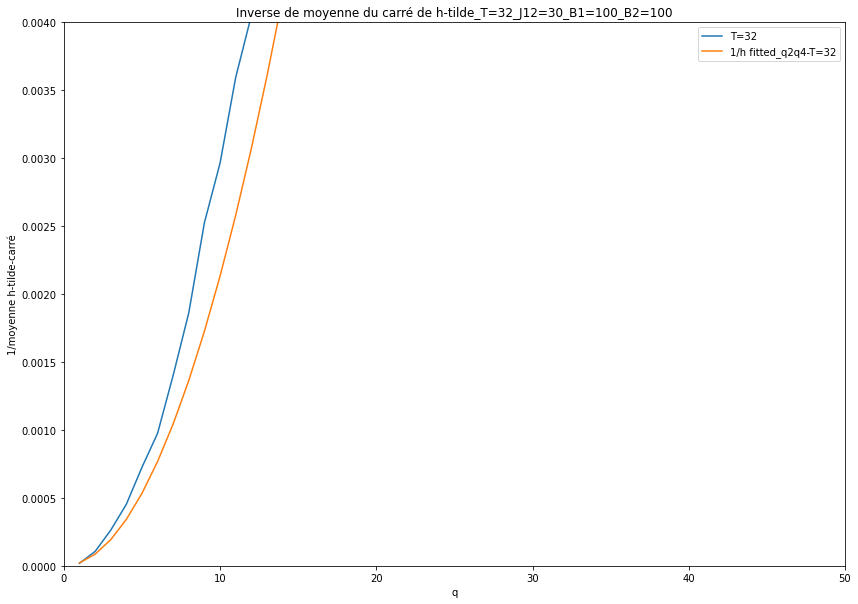

In [26]:
ind_R=0
plt.figure(figsize=(14, 10))
for ind_T in range(nb_temperatures):
    plt.plot(list(range(1,ncol)),1/moyenne_q[ind_R][ind_T][1:], label="T="+str(temperatures[ind_T]))
    plt.plot(list(range(1,ncol//2)),hfitted_q2q4[ind_R][ind_T][1:], label="1/h fitted_q2q4-T="+str(temperatures[ind_T]))
plt.xlabel("q")
plt.ylabel("1/moyenne h-tilde-carré")
plt.ylim(0,0.004)
plt.xlim(0,50)
plt.legend()
plt.title("Inverse de moyenne du carré de h-tilde_T="+str(temperatures[ind_T])+"_J12="+str(J12)+"_B1="+str(B1)+"_B2="+str(B2))
#plt.plot(np.log(1/norm_moyenne_q))

In [27]:
#interface_step=600
duree_totale=1000000
duree_en_steps=duree_totale//interface_step
les_corr_moyennes=np.zeros((nb_temperatures, ncol, duree_en_steps), dtype=float)
les_corr_valides_moyennes=np.zeros((nb_temperatures, ncol, duree_en_steps), dtype=int)

les_corr=np.zeros((nb_realisations, nb_temperatures, ncol, duree_en_steps), dtype=float)
les_corr_norm=np.zeros((nb_realisations, nb_temperatures, ncol, duree_en_steps), dtype=float)
les_corr_valides=np.zeros((nb_realisations, nb_temperatures, ncol, duree_en_steps), dtype=int)
valeur_tau_zero=0

#spectres = np.zeros((nb_realisations, nb_temperatures, nbmax_interfaces, ncol), dtype=complex)
spectres_limite_moyenne=np.zeros((nb_realisations, nb_temperatures, ncol), dtype=complex)
spectres_limite=np.zeros((nb_temperatures, ncol), dtype=float)

for ind_R in range(nb_realisations):    
    
    print("Realisation R=",ind_R)
    for ind_T in range(nb_temperatures):
        print("T=",temperatures[ind_T])
        #for q in range(ncol//2): 
        for q in range(1,20):   
            print("q=",q)
            spectres_limite_moyenne[ind_R][ind_T][q] = 0
            compteur_spectres=0
            for i in range(nb_interfaces_lues[ind_R][ind_T]):
                if (i==0):
                    val=0.0
                    for ind in range(nb_interfaces_lues[ind_R][ind_T]):
                        val+=(abs(spectres[ind_R][ind_T][ind][q]))**2
                    valeur_tau_zero = val/nb_interfaces_lues[ind_R][ind_T]
                    les_corr_norm[ind_R][ind_T][q][0]=1
                    les_corr[ind_R][ind_T][q][0]=valeur_tau_zero
                    les_corr_valides[ind_R][ind_T][q][0]=1  
                    spectres_limite_moyenne[ind_R][ind_T][q] = spectres[ind_R][ind_T][0][q] / valeur_tau_zero
                    continue
                val=0.0
                compteur=0
                for ind in range(nb_interfaces_lues[ind_R][ind_T] - i):
                    if (temps_interfaces[ind_R][ind_T][ind+i] - temps_interfaces[ind_R][ind_T][ind] == i*interface_step):
                        val+=((spectres[ind_R][ind_T][ind][q]) * (spectres[ind_R][ind_T][ind+i][q]).conjugate())
                        compteur+=1
                        
                if (compteur>0):
                    val/=compteur
                    les_corr_norm[ind_R][ind_T][q][i]= abs(val/valeur_tau_zero)   #abs(val/valeur_tau_zero) #(val/valeur_tau_zero).real
                    les_corr[ind_R][ind_T][q][i]=  abs(val)       #abs(val)  #val.real 
                    les_corr_valides[ind_R][ind_T][q][i]=1
                else:
                    les_corr_valides[ind_R][ind_T][q][i]=0
                    
                spectres_limite_moyenne[ind_R][ind_T][q] += spectres[ind_R][ind_T][i][q] /valeur_tau_zero
                compteur_spectres+=1
            if (compteur_spectres>0):
                spectres_limite_moyenne[ind_R][ind_T][q] = (abs(spectres_limite_moyenne[ind_R][ind_T][q]/compteur_spectres))**2
            

for ind_T in range(nb_temperatures):
    print("Temperature T=",temperatures[ind_T])
    for q in range(1,20):
        for tau in range(duree_en_steps):
            compteur=0
            for ind_R in range(nb_realisations):
                if (les_corr_valides[ind_R][ind_T][q][tau]==1):
                    les_corr_moyennes[ind_T][q][tau] += les_corr_norm[ind_R][ind_T][q][tau]
                    compteur+=1
            if (compteur>0):
                les_corr_moyennes[ind_T][q][tau] /= compteur
                les_corr_valides_moyennes[ind_T][q][tau] = 1
                
        compteur_spec=0
        spectres_limite[ind_T][q]=0
        for ind_R in range(nb_realisations):
            spectres_limite[ind_T][q] += spectres_limite_moyenne[ind_R][ind_T][q]
            compteur_spec +=1
        if (compteur_spec>0):
            spectres_limite[ind_T][q] /= compteur_spec
    

Realisation R= 0
T= 32
q= 1
q= 2
q= 3
q= 4
q= 5
q= 6
q= 7
q= 8
q= 9
q= 10
q= 11
q= 12
q= 13
q= 14
q= 15
q= 16
q= 17
q= 18
q= 19
Temperature T= 32


/tmp/ipykernel_5157/3805849679.py:74: ComplexWarning: Casting complex values to real discards the imaginary part
  spectres_limite[ind_T][q] += spectres_limite_moyenne[ind_R][ind_T][q]


In [28]:
spectres_limite[0][1:20]

array([5.29332862e-07, 1.02016169e-06, 3.22735004e-07, 1.44488758e-06,
       1.12476941e-06, 1.67397722e-08, 3.14636746e-06, 8.73327447e-07,
       1.14245555e-06, 8.82425485e-07, 1.59552720e-06, 1.61680028e-06,
       5.62706478e-07, 1.29772874e-06, 2.34545777e-05, 4.65509384e-06,
       1.44267652e-06, 1.03352955e-05, 5.79137450e-06])

rappel: etendues des correlations pour les réalisations= []


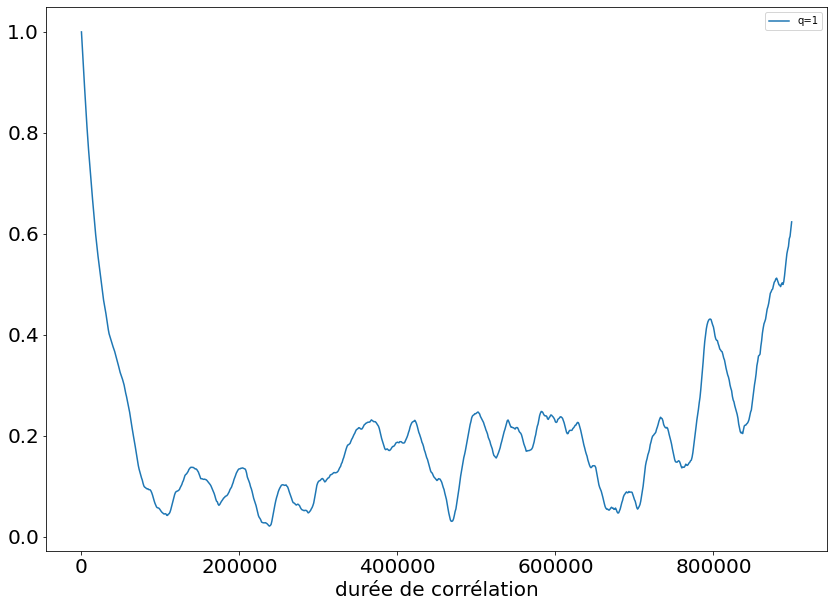

In [29]:
#temperatures = [30, 60, 90] 
plt.figure(figsize=(14, 10))
duree_corr=900000
#duree_corr=duree_limite_corr_max
duree_corr_en_steps=duree_corr//interface_step
#plt.ylim([0, 512])
#ind_R=0
for ind_T in [0]:
    for q in range( 1,2):  
        liste_points_x=[]
        liste_points_y=[]
        for tau in range(duree_corr_en_steps):
            if (les_corr_valides_moyennes[ind_T][q][tau]==1):
                liste_points_x.append(tau*interface_step)
                liste_points_y.append(les_corr_moyennes[ind_T][q][tau]) # - spectres_limite[ind_T][q])
                #liste_points_y.append(les_corr[ind_T][q][tau])
#         print("q=",q)                
#         print(liste_points_x)
#         print(liste_points_y)

        plt.plot(liste_points_x,liste_points_y, label="q="+str(q))
        #plt.plot(liste_points_x,liste_points_y)
#plt.yscale('log') 
#plt.xscale('log') 
plt.legend()
print("rappel: etendues des correlations pour les réalisations=",liste_etendues_corr)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("durée de corrélation",fontsize=20)
plt.show()

In [30]:
nb_interfaces_lues

array([[1000]])

In [110]:
#plt.plot([1,5,9],[3,4,9])

In [ ]:
# for i in range(4):
#     print(i)

In [ ]:
#plt.plot([2,8,9],[1,3,5])

In [ ]:
#np.argmax(np.log(moyenne_q[0][30:100])) + 30

In [ ]:
############################ brouillon ################################################

In [ ]:
tab=np.array([1+0.1j,2+1.j,3+1.j])
tab

In [ ]:
(abs(tab))**2

In [ ]:
1/tab

In [ ]:
tab=np.array([[1,-2,3],
              [4,5,6]])
1/tab

In [ ]:
[np.mean(abs(tab[0:2,i])**2) for i in [0,1,2]]

In [ ]:
abs(4+3.j)**2

In [ ]:
A=np.array(list(range(1,10)))

In [ ]:
len(A)

In [ ]:
len(A[2:])

In [ ]:
np.mean(A[A>5])